In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 100em; }</style>"))
# ^This import is to have a larger display on the output, I'm not sure how to
# do that in Notebook

# find and open the Dark FITS files that were exposed for 30 secs and store them all in one list
file_prefix = "lab1_3_3_series.0000000"
file_end = ".FIT"
flat_data = [None]*10
for i in range(0, 10, 1):
    filename = file_prefix + str(i) + file_end
    list = fits.open('images/'+filename)
    image_data = list[0].data
    flat_data[i] = image_data


In [3]:
median_values = []
values = [flat_data[x] for x in range(0,10)]
# print(values)
median_values.append(np.median(values, axis=0))
median_values = median_values[0]


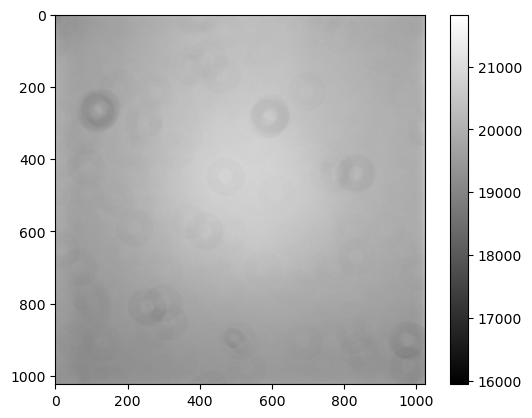

In [4]:
plt.imshow(median_values, cmap='gray')
plt.imsave("median_falt_field.png", median_values)
plt.colorbar()

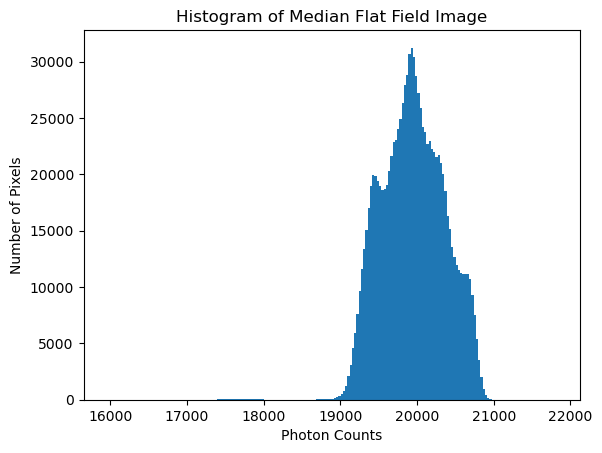

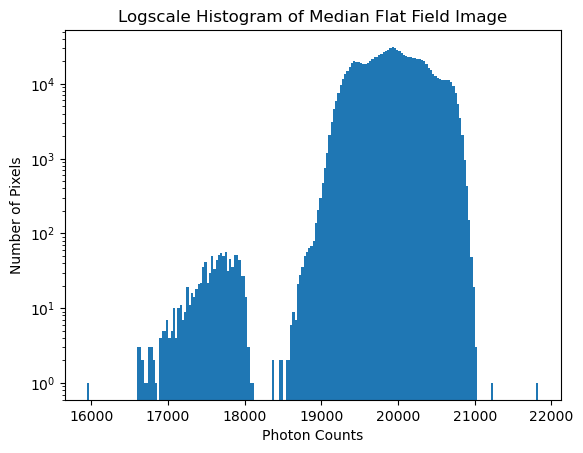

In [7]:
flat_median = median_values.flatten()
histogram = plt.hist(flat_median, range=(np.min(flat_median), np.max(flat_median)), bins=200)
plt.xlabel('Photon Counts')
plt.ylabel("Number of Pixels")
plt.title("Histogram of Median Flat Field Image")
plt.show()
histogram = plt.hist(flat_median, range=(np.min(flat_median), np.max(flat_median)), bins=200)
plt.xlabel('Photon Counts')
plt.ylabel("Number of Pixels")
plt.title("Logscale Histogram of Median Flat Field Image")
plt.yscale("log")
plt.show()